In [1]:
import os
import tensorflow as tf

from tensorflow import keras

from functions.loading_data import SMALLER_HEIGHT, SMALLER_WIDTH
from functions.plotting import plot_single_output_history

In [2]:
base_data_dir = os.path.join('..', '..', 'data2', 'images_original_inception_resnet_v2_200x150_categorized')
train_data_dir = os.path.join(base_data_dir, 'training')
valid_data_dir = os.path.join(base_data_dir, 'validation')
test_data_dir = os.path.join(base_data_dir, 'test')

train_ds = keras.utils.image_dataset_from_directory(
    directory=train_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(SMALLER_HEIGHT, SMALLER_WIDTH))
valid_ds = keras.utils.image_dataset_from_directory(
    directory=valid_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(SMALLER_HEIGHT, SMALLER_WIDTH))
test_ds = keras.utils.image_dataset_from_directory(
    directory=test_data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(SMALLER_HEIGHT, SMALLER_WIDTH))

Found 17224 files belonging to 8 classes.
Found 4307 files belonging to 8 classes.
Found 3800 files belonging to 8 classes.


In [3]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal_and_vertical'),
    keras.layers.RandomRotation(1),
    keras.layers.RandomBrightness((-.3, .3))
])
train_ds = train_ds\
    .cache()\
    .shuffle(1000)\
    .map(lambda x, y: (data_augmentation(x), y))\
    .prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds\
    .cache()\
    .prefetch(buffer_size=tf.data.AUTOTUNE)

The below is kind of a random choice, something I tend to start my experiments with when I'm doing image recognition. For this task it puts the bar very low.

In [4]:
num_classes = 8


def get_simplest_model(
        multiply_first: int = 1,
        multiply_second: int = 1,
        multiply_third: int = 1) -> keras.Model:
    def get_conv_module(units: int) -> list[keras.layers.Layer]:
        yield keras.layers.Conv2D(units, 3, activation='relu', padding='same', strides=strides)
        yield keras.layers.BatchNormalization()
        yield keras.layers.Conv2D(units, 3, activation='relu', padding='same')
        yield keras.layers.BatchNormalization()
        yield keras.layers.MaxPooling2D()

    units_and_strides = [
        (32 * multiply_first, 2),
        (64 * multiply_second, 1),
        (128 * multiply_third, 1)]
    model = keras.Sequential()

    model.add(keras.layers.Rescaling(1./255, input_shape=(SMALLER_HEIGHT, SMALLER_WIDTH, 3)))

    for units, strides in units_and_strides:
        for layer in get_conv_module(units):
            model.add(layer)

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [ ]:
model = get_simplest_model()

model.summary()

In [ ]:
history1 = model.fit(train_ds, validation_data=valid_ds, epochs=30)

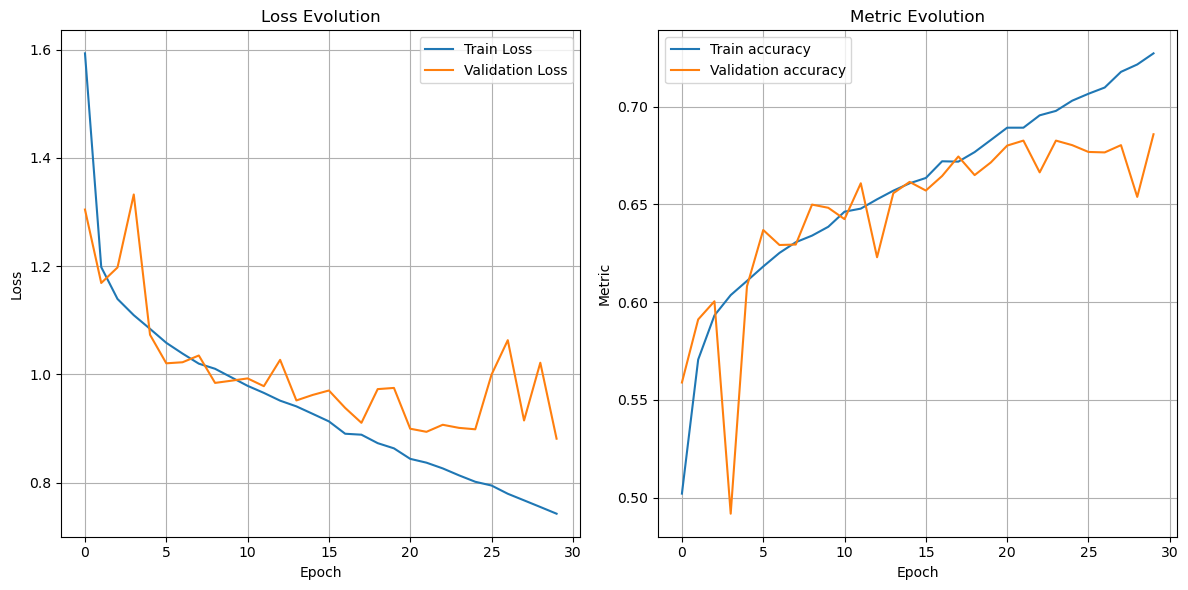

In [8]:
plot_single_output_history(history1)

In [9]:
model = get_simplest_model(2)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 200, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 100, 64)       1792      
                                                                 
 batch_normalization_12 (Bat  (None, 75, 100, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 100, 64)       36928     
                                                                 
 batch_normalization_13 (Bat  (None, 75, 100, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 50, 64)      

In [ ]:
history2 = model.fit(train_ds, validation_data=valid_ds, epochs=50)

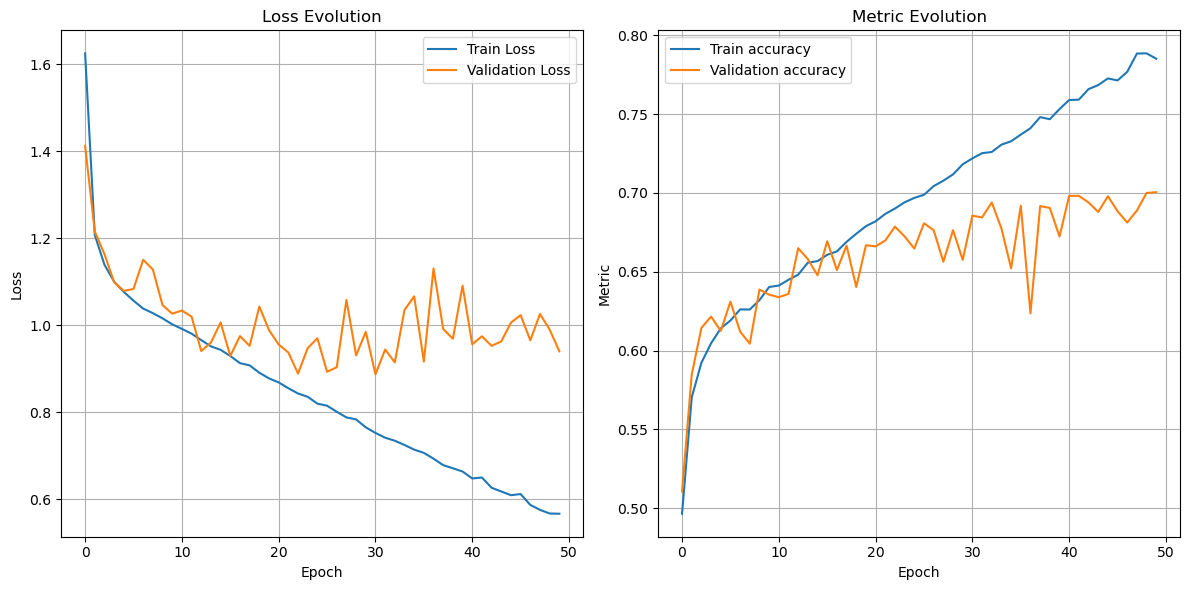

In [11]:
plot_single_output_history(history2)

In [12]:
model = get_simplest_model(2, 2)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 200, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 100, 64)       1792      
                                                                 
 batch_normalization_18 (Bat  (None, 75, 100, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 100, 64)       36928     
                                                                 
 batch_normalization_19 (Bat  (None, 75, 100, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 50, 64)      

In [ ]:
history3 = model.fit(train_ds, validation_data=valid_ds, epochs=50)

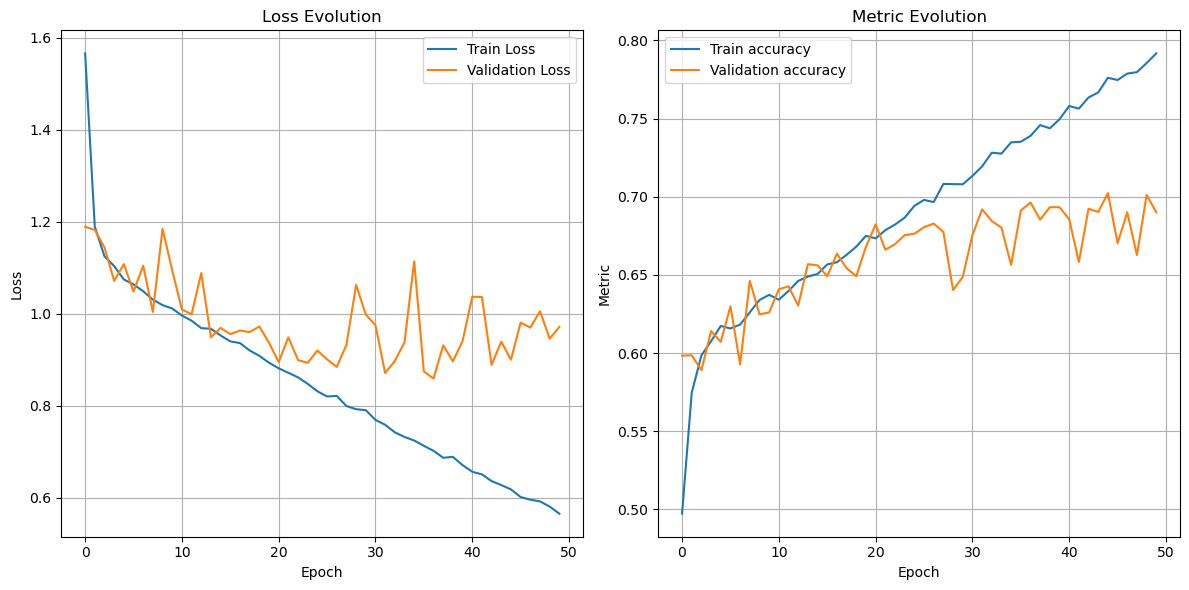

In [14]:
plot_single_output_history(history3)

In [5]:
model = get_simplest_model(2, 2, 3)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 75, 100, 64)       1792      
                                                                 
 batch_normalization (BatchN  (None, 75, 100, 64)      256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 100, 64)       36928     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 100, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 50, 64)      

In [ ]:
history4 = model.fit(train_ds, validation_data=valid_ds, epochs=50)

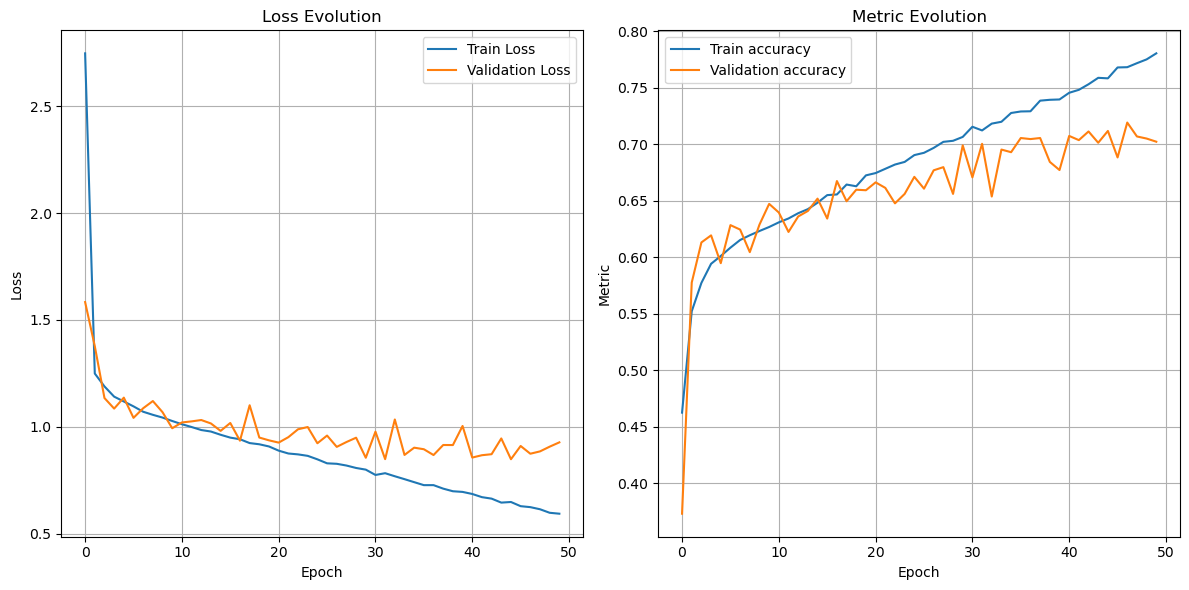

In [7]:
plot_single_output_history(history4)

In [5]:
def get_bigger_model(
        multiply_first: int = 1,
        multiply_second: int = 1,
        multiply_third: int = 1) -> keras.Model:
    def get_conv_module(units: int) -> list[keras.layers.Layer]:
        yield keras.layers.Conv2D(units, 5, activation='relu', padding='same', strides=strides)
        yield keras.layers.BatchNormalization()
        yield keras.layers.Conv2D(units, 5, activation='relu', padding='same')
        yield keras.layers.BatchNormalization()
        yield keras.layers.MaxPooling2D()

    units_and_strides = [
        (64 * multiply_first, 2),
        (128 * multiply_second, 1),
        (256 * multiply_third, 1)]
    model = keras.Sequential()

    model.add(keras.layers.Rescaling(1./255, input_shape=(SMALLER_HEIGHT, SMALLER_WIDTH, 3)))

    for units, strides in units_and_strides:
        for layer in get_conv_module(units):
            model.add(layer)

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

In [6]:
model = get_bigger_model(2, 2, 3)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 75, 100, 128)      9728      
                                                                 
 batch_normalization (BatchN  (None, 75, 100, 128)     512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 100, 128)      409728    
                                                                 
 batch_normalization_1 (Batc  (None, 75, 100, 128)     512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 50, 128)     

In [ ]:
history5 = model.fit(train_ds, validation_data=valid_ds, epochs=40)

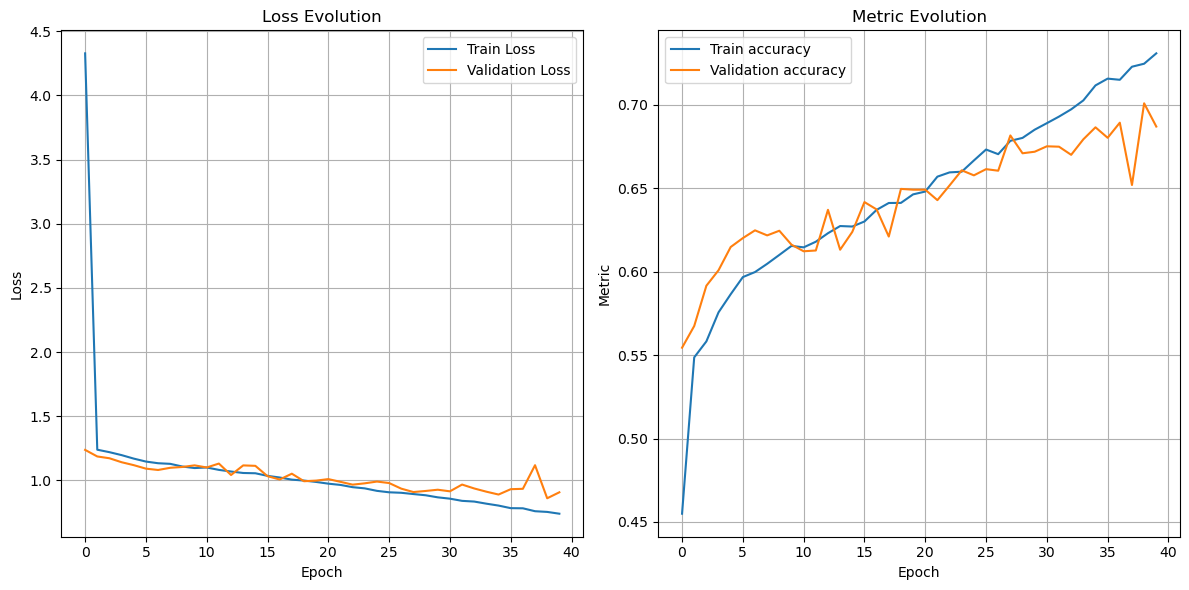

In [8]:
plot_single_output_history(history5)